<a href="https://colab.research.google.com/github/Twisterrr/tu-assignment/blob/main/Big_Data_Concept.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Big Data Concepts Project** 



## Project 

---



> D22125067 Clement BERARD


---

### **Summary**

Dataset : https://raw.githubusercontent.com/Twisterrr/tu-assignment/main/fifa.csv

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
from math import ceil

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Twisterrr/tu-assignment/main/fifa.csv', usecols = [' name', ' rating', ' position', ' height', ' foot', ' rare', ' pace', ' shooting', ' passing', ' dribbling', ' defending', ' heading', ' diving', ' handling', ' kicking', ' reflexes', ' speed', ' positioning']) #keeping only the date and data columns we will use
df.columns = df.columns.str.lstrip() # Remove space before variables
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x) # Remove space before datas
df = df.replace(r'^\s*$', 'None', regex=True) #Regex with r'^\s*$' which matches empty cells
df.to_csv('fifa.csv', index=False)  # Create the new csv
print(df.head())

                     name  rating position  height   foot  rare  pace  \
0            Gábor Király      69       GK     191  Right     0  None   
1            Frederik Boi      65        M     184  Right     0    61   
2         Tomasz Szewczuk      57        A     185  Right     0    65   
3  Steeve Joseph-Reinette      63        D     180   Left     0    68   
4            Kamel Chafni      72        M     181  Right     0    75   

  shooting passing dribbling defending heading diving handling kicking  \
0     None    None      None      None    None     70       66      63   
1       65      63        59        62      62   None     None    None   
2       54      43        53        55      74   None     None    None   
3       38      51        46        64      71   None     None    None   
4       64      67        72        57      66   None     None    None   

  reflexes speed  positioning  
0       74    35         66.0  
1     None  None          NaN  
2     None  None    

## IS THERE A LINK BETWEEN RARITY AND A PLAYER'S GRADE BASED ON WHETHER THEY ARE RIGHT OR LEFT HANDED ?

In [ ]:
foot_right_left = np.array(df['foot'].values.flatten())
count_right_left = pd.Series(foot_right_left).value_counts()

fig = px.bar(x=count_right_left.index, y=count_right_left.values, color=count_right_left.values,
             color_continuous_scale='RdBu', title='Distribution of people with left-handed or right-handed feet')
fig.update_layout(xaxis_title='Foot', yaxis_title='Number of persons')
fig.show()

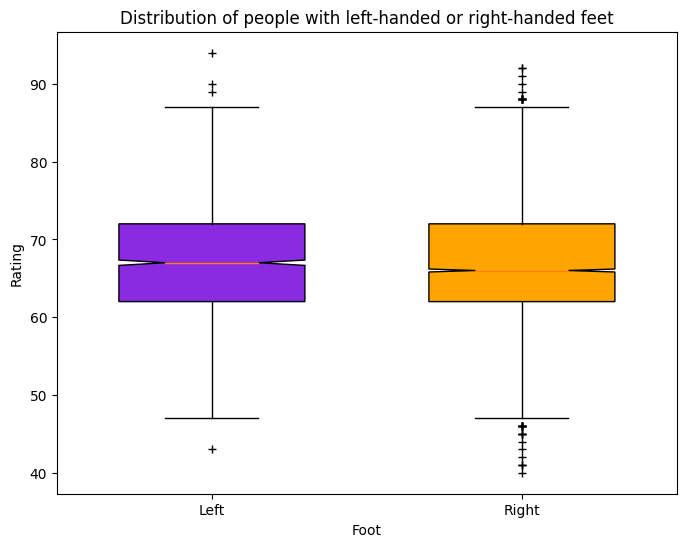

In [ ]:
foot_right_left = np.array(df['foot'].values.flatten())
count_right_left = pd.Series(foot_right_left).value_counts()
grouped_df = df.groupby('foot')['rating'].apply(list).reset_index()

fig, ax = plt.subplots(figsize=(8, 6))
bp = ax.boxplot([grouped_df.loc[grouped_df['foot']=='Left', 'rating'].values[0],
                 grouped_df.loc[grouped_df['foot']=='Right', 'rating'].values[0]],
                patch_artist=True, widths=0.6, notch=True, sym='+')
colors = ['#8A2BE2', '#FFA500']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Distribution of people with left-handed or right-handed feet')
plt.xticks([1, 2], ['Left', 'Right'])
plt.xlabel('Foot')
plt.ylabel('Rating')
plt.show()

<Axes: xlabel='rare', ylabel='foot'>

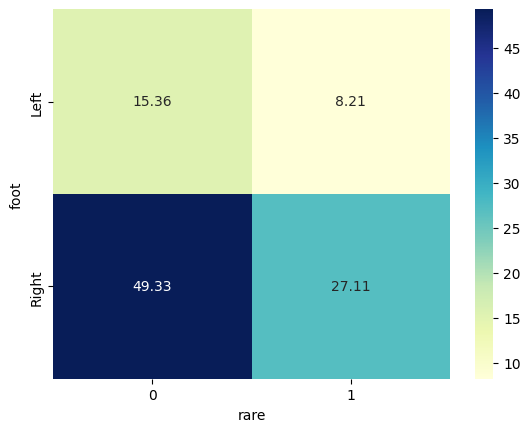

In [ ]:
pivot_table = df.pivot_table(index='foot', columns='rare', aggfunc='size')

total = pivot_table.sum().sum()
pivot_table_percentages = (pivot_table / total) * 100

sns.heatmap(pivot_table_percentages, annot=True, cmap='YlGnBu', fmt='.2f')

## WHAT IS THE POSITION OF A FOOTBALL PLAYER RECEIVING THE MOST "RARE" QUALIFICATION ? 

Finding the most positions in the most rewarded.

In [ ]:
res = df['position'].value_counts().reset_index()
res.columns = ['position', 'count']

fig = go.Figure(data=[go.Pie(labels=res['position'], values=res['count'])])
fig.update_traces(hole=0.4, hoverinfo="label+percent+value",
                  marker=dict(colors=px.colors.qualitative.Pastel, line=dict(color='#FFFFFF', width=2)))

legend = dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
fig.update_layout(title_text='Number of Players by Position', showlegend=True, legend=legend)

labels = [f"{cat}: {count}" for cat, count in zip(res['position'], res['count'])]
fig.update_layout(annotations=[dict(text='<br>'.join(labels),
                                     x=0.5,
                                     y=-0.2,
                                     font=dict(size=12),
                                     showarrow=False,
                                     xanchor='center',
                                     xref="paper",
                                     yref="paper")])

fig.show()

In [ ]:
res = df.groupby(['position']).sum().reset_index()
fig = px.bar(res.sort_values(by=['rare'],ascending = False)[0:10], x='position', y='rare', color = 'rare')
fig.update_layout(
    title="Position of players with the most 'Rare' qualification",
    xaxis_title="Position of Footballers",
    yaxis_title="Number of players qualified as 'Rare'"
)
fig.show()

<ipython-input-17-f83e82212137>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
labels = ['A', 'M', 'GK', 'D']
total_players = [2082, 3041, 930, 2794]
rare_players = [989, 1057, 321, 757]
rare_percentages = [round(100*rare_players[i]/total_players[i], 2) for i in range(len(labels))]

fig = go.Figure(data=[go.Pie(labels=labels, values=rare_percentages, hole=0.4, textinfo='label+percent',
                             marker=dict(colors=px.colors.qualitative.Pastel, line=dict(color='#FFFFFF', width=2)))])

fig.update_layout(title_text='Percentage of Rare players by category out of total players', showlegend=True,
                  legend=dict(title='Categories :', orientation='h', yanchor='bottom', y=1.05, xanchor='right', x=1),
                  annotations=[dict(text='Total Players', font=dict(size=18), x=0.5, y=0.5, showarrow=False),
                               dict(text=sum(total_players), font=dict(size=40), x=0.5, y=0.3, showarrow=False)])
fig.show()

## DOES THE HEIGHT OF THE PLAYERS INFLUENCE ON AVERAGE THE QUALITY OF THEIR RATING ? 

In [ ]:
df['height'] = (df['height'] // 10) * 10

counts = df.groupby('height').size().reset_index(name='counts')
counts['proportion'] = counts['counts'] / counts['counts'].sum() * 100

fig = px.bar(counts, x='height', y='counts', color='counts',
             color_continuous_scale=px.colors.sequential.Plasma,
             labels={'height': 'Height (in cm)', 'counts': 'Number of players'})

fig.update_traces(text=counts['proportion'].round(1).astype(str) + '%',
                  textposition='outside')

fig.update_layout(title='Players height distribution',
                  xaxis_title='Height (in cm)',
                  yaxis_title='Number of players')
fig.show()

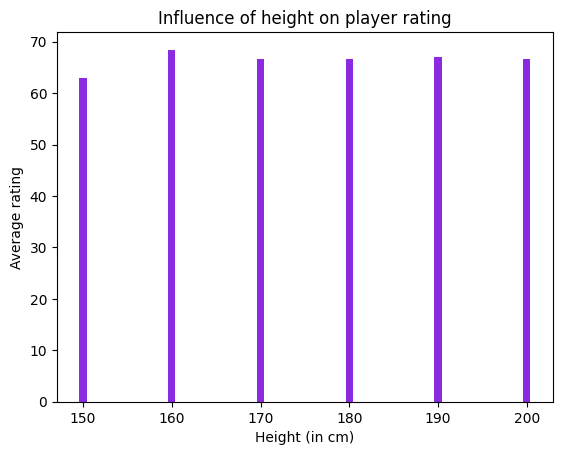

In [ ]:
df['height'] = (df['height'] // 10) * 10

rating_by_taille = df.groupby('height')['rating'].mean()

fig, ax = plt.subplots()
ax.bar(rating_by_taille.index, rating_by_taille.values, color='#8A2BE2')
ax.set_xlabel('Height (in cm)')
ax.set_ylabel('Average rating')
ax.set_title('Influence of height on player rating')
plt.show()

In [ ]:
df_grouped = df.groupby('height')
top_players = []

for name, group in df_grouped:
    top_players.append(group.nlargest(10, 'rating'))

top_players_df = pd.concat(top_players)

fig = px.scatter(top_players_df, x='height', y='rating', color='position', symbol='position',
                 color_discrete_sequence=px.colors.qualitative.Dark24,
                 labels={'height': 'Height (in cm)', 'rating': 'Player Rating', 'position': 'Player Position :'})
fig.update_layout(title='Top 5 Players by Height Category')
fig.show()

## WHAT ARE THE 2 MOST IMPORTANT CHARACTERISTICS ON AVERAGE OF PLAYERS BY POSITION ?

In [ ]:
positions = ['GK', 'A', 'D', 'M']
poste_mean = pd.DataFrame(columns=['Caracteristic', 'Mean', 'Position'])

poste_carac = {}

for position in positions:
    poste_cols = ['diving', 'handling', 'kicking', 'reflexes', 'speed', 'positioning'] if position == 'GK' else ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'heading']
    poste_data = df[df['position'] == position][poste_cols]
    
    poste_data = poste_data.apply(pd.to_numeric, errors='coerce')
    poste_data_mean = poste_data.mean().nlargest(2)
    
    poste_mean = pd.concat([poste_mean, pd.DataFrame({'Caracteristic': poste_data_mean.index, 'Mean': poste_data_mean.values, 'Position': [position]*2})])

    print(f"The two most important characteristics for the {position} position are:\n")
    print(poste_mean)

    fig = go.Figure()
    for col in poste_cols:
        fig.add_trace(go.Box(x=poste_data[col].dropna(), name=col))

    fig.update_layout(
        title={"text": f"Box plot of characteristics for the {position} position", "x": 0.5},
        xaxis_title="Characteristic",
        yaxis_title="Value",
        legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
        plot_bgcolor='rgba(255,255,255,100)',
        paper_bgcolor='rgba(255,255,255,100)',
        xaxis=dict(linecolor='black', linewidth=1, mirror=True),
        yaxis=dict(linecolor='black', linewidth=1, mirror=True)
    )
    fig.show()

The two most important characteristics for the GK position are:

  Caracteristic       Mean Position
0      reflexes  68.865591       GK
1        diving  67.351613       GK


The two most important characteristics for the A position are:

  Caracteristic       Mean Position
0      reflexes  68.865591       GK
1        diving  67.351613       GK
0          pace  72.488473        A
1     dribbling  66.664265        A


The two most important characteristics for the D position are:

  Caracteristic       Mean Position
0      reflexes  68.865591       GK
1        diving  67.351613       GK
0          pace  72.488473        A
1     dribbling  66.664265        A
0     defending  68.069435        D
1       heading  66.837867        D


The two most important characteristics for the M position are:

  Caracteristic       Mean Position
0      reflexes  68.865591       GK
1        diving  67.351613       GK
0          pace  72.488473        A
1     dribbling  66.664265        A
0     defending  68.069435        D
1       heading  66.837867        D
0          pace  68.493916        M
1     dribbling  66.045709        M


In [ ]:
fig = px.scatter(poste_mean, x="Position", y="Mean", color="Caracteristic", size="Mean", title="Mean values of the two most important characteristics for each position")

fig.update_layout(
    xaxis_title="Position",
    yaxis_title="Mean",
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
    plot_bgcolor='rgba(255,255,255,100)',
    paper_bgcolor='rgba(255,255,255,100)',
    xaxis=dict(linecolor='black', linewidth=1, mirror=True),
    yaxis=dict(linecolor='black', linewidth=1, mirror=True)
)

fig.show()